<h3>기계학습 기말과제 (wine_review.csv)</h3>
<d>
    <i>
        학번 : 201920948 <br>
        이름 : 신주현
    </i>
    <p>활용 데이터셋 : wine_review.csv</p>
</d>

# 0. 활용 라이브러리 정리

In [2]:
! pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 566.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.2 MB/s eta 0:00:00


In [52]:
# 데이터 처리 및 분석을 위한 라이브러리
import numpy as np  # 수치 계산을 위한 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화를 위한 라이브러리
import pandas as pd  # 데이터 처리를 위한 라이브러리
import seaborn as sns  # 고급 시각화를 위한 라이브러리

# 텍스트 처리 및 분석을 위한 라이브러리
import re  # 정규 표현식을 위한 라이브러리
import nltk  # 자연어 처리를 위한 라이브러리
from nltk.corpus import stopwords  # 불용어(stop words) 처리를 위한 모듈
from nltk.tokenize import word_tokenize  # 토큰화를 위한 모듈
from nltk.stem import WordNetLemmatizer  # 어간 추출을 위한 모듈
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # 감정 분석을 위한 모듈

# 머신러닝을 위한 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF 벡터화를 위한 모듈
from sklearn.model_selection import train_test_split, GridSearchCV  # 데이터 분할 및 하이퍼파라미터 튜닝을 위한 모듈
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델
from sklearn.pipeline import Pipeline  # 파이프라인을 위한 모듈

# 모델 평가를 위한 라이브러리
from sklearn.metrics import (
    accuracy_score,  # 정확도 평가
    precision_score,  # 정밀도 평가
    recall_score,  # 재현율 평가
    f1_score,  # F1 점수 평가
    roc_auc_score,  # ROC AUC 점수 평가
    roc_curve,  # ROC 곡선
    auc,  # AUC 계산
    confusion_matrix,  # 혼합 행렬
    classification_report,  # 분류 보고서
    ConfusionMatrixDisplay  # 혼합 행렬 시각화
)

# 1. 데이터 로드 및 구조 확인

In [75]:
# 데이터 로드
df = pd.read_csv("./wine_review.csv")

# 데이터 확인
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2890 non-null   object 
 1   asins                 870 non-null    object 
 2   brand                 2825 non-null   object 
 3   categories            2890 non-null   object 
 4   dateAdded             2890 non-null   object 
 5   dateUpdated           2890 non-null   object 
 6   descriptions          2738 non-null   object 
 7   dimension             1838 non-null   object 
 8   ean                   2166 non-null   object 
 9   flavors               151 non-null    object 
 10  keys                  2890 non-null   object 
 11  manufacturer          849 non-null    object 
 12  manufacturerNumber    2457 non-null   object 
 13  name                  2890 non-null   object 
 14  reviews.date          2552 non-null   object 
 15  reviews.dateAdded    

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


# 2. 데이터 전처리 진행
<d>데이터의 품질 상승 / 분석의 정확성을 위해 전처리 및 중복값을 제거</d>

In [76]:
# 필요한 내용인 리뷰 내용이 포함된 열만 선택
df = df[["reviews.title", "reviews.text"]]

# 리뷰 제목의 결측값을 빈 문자열로 대체
df["reviews.title"] = df["reviews.title"].fillna("")

# 중복 리뷰 제거
df.drop_duplicates(subset=["reviews.text"], inplace=True)

# 리뷰 텍스트의 결측값 제거
df = df.dropna(subset=["reviews.text"])

# 3. NLTK 리소스 다운로드

In [55]:
# punkt: 문장과 단어 단위로 텍스트 토큰화
nltk.download('punkt')

# stopwords: 불용어 목록 제공
nltk.download('stopwords')

# wordnet: 유의어 DB
nltk.download('wordnet')

# vader_lexicon: vader 감성 분석 모델
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to /Users/marko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/marko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marko/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marko/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 4. 텍스트 전처리 함수 정의
<p>
    <h3>[전처리 진행내용]</h3>
    <li>소문자 변환</li>
    <li>숫자 제거</li>
    <li>공백 제거</li>
    <li>구두점 제거</li>
    <li>토큰화</li>
    <li>불용어 제거</li>
    <li>표제어 추출</li>
</p>

In [77]:
# 텍스트 전처리 함수 정의
def data_preprocessing(text):
    # 소문자로 변환
    text = text.lower()
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 공백 제거
    text = re.sub(r'\s+', ' ', text)
    # 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 토큰화
    tokens = word_tokenize(text)
    # 불용어 제거
    stop_word = [word for word in tokens if word not in stopwords.words("english")]
    # 어간 추출
    lemmatizer = WordNetLemmatizer()
    lemmatization = [lemmatizer.lemmatize(word) for word in stop_word]
    # 전처리된 텍스트 반환
    return ' '.join(lemmatization)

# 텍스트 전처리 적용
df["reviews.text"] = df["reviews.text"].apply(data_preprocessing)
df["reviews.title"] = df["reviews.title"].apply(data_preprocessing)


# 5. 감성 분석
<d>
    <h3>[Compound Score]</h3>
    <p>
        <li>텍스트의 전반적인 감성을 나타냄. </li>
        <li>-1 ~ 1 사이의 값을 가지며 값이 클수록 긍정적인 감성을 의미함.</li>
    </p>
</d>

In [78]:
# 감성 분석
vader_sentiment = SentimentIntensityAnalyzer()

# 각 리뷰 텍스트의 감성 점수 계산
df["text_vader"] = df["reviews.text"].apply(lambda reviews: vader_sentiment.polarity_scores(reviews))

# 각 리뷰 제목의 감성 점수 계산
df["title_vader"] = df["reviews.title"].apply(lambda reviews: vader_sentiment.polarity_scores(reviews))

# 리뷰 텍스트의 복합 감성 점수 추출
df["text_compound"] = df["text_vader"].apply(lambda score_dict: score_dict["compound"])

# 리뷰 제목의 복합 감성 점수 추출
df["title_compound"] = df["title_vader"].apply(lambda score_dict: score_dict["compound"])

# 텍스트와 제목의 감성 점수 평균 계산
df["compound"] = (df["text_compound"] + df["title_compound"]) / 2

# 감성 점수를 기준으로 레이블 생성 (0.05 이상이면 긍정(1) else 부정(0))
df["label"] = df["compound"].apply(lambda x: 1 if x >= 0.05 else 0)

# 6. 텍스트 벡터화 및 데이터 분할

In [79]:
# 리뷰 제목 + 텍스트 합치기
df["reviews"] = df["reviews.title"] + "," + df["reviews.text"]

# 입력 데이터 'X'와 레이블 'y' 설정
X = df['reviews']
y = df['label']

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. 모델 학습 및 하이퍼파라미터 튜닝
<i>그리드 서치를 활용한 하이퍼파라미터 튜닝</i>

In [80]:
#긍정/부정이라는 두 가지 감정을 이진분류로 파악할 수 있는 로지스틱 회귀분석을 사용하고자 함.
#로지스틱 회귀 분류 모델을 사용하기 전 TF-IDF 벡터화를 위한 파이프라인
# 파이프라인 설정
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # TF-IDF 벡터화
    ('logreg', LogisticRegression(solver='liblinear'))  # 로지스틱 회귀
])

# 하이퍼파라미터 그리드 정의
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],  # TF-IDF 최대 문서 빈도
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # n-그램 범위
    'logreg__C': [0.1, 1, 10]  # 로지스틱 회귀의 규제 매개변수
}

# 그리드 서치
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.1, 1, 10],
                         'tfidf__max_df': [0.8, 0.9, 1.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [82]:
# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

Best parameters found:  {'logreg__C': 10, 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 1)}


# 8. 모델 평가

In [83]:
# 정확도, 정밀도, 재현율, F1 점수를 통한 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC 점수 계산
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# 학습 데이터 평가 결과
# 정확도는 0.90980로 90.98%의 정확도로 예측할 수 있다.
# class 0에서는 비교적 낮은 재현율과 낮은 f1 Score을 가지고 있다. 
# class 1에서는 높은 정밀도와 재현율, f1 Score을 가지고 있다.
# 즉, 긍정적인 반응(class 1)에 대해서는 잘 예측하고 있으나, 부정적인 반응(class 2)에 대해서는 모델 개선이 필요하다.

# ROC-AUC 평가 결과
# ROC-AUC는 10에 가까울 수록 분류 성능이 높다는 것을 의미한다. 
# 따라서 약 0.8859의 결과는 높은 분류 성능을 가진다는 것을 알 수 있다.

Accuracy: 0.9098039215686274
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.23      0.36        84
           1       0.91      0.99      0.95       681

    accuracy                           0.91       765
   macro avg       0.87      0.61      0.65       765
weighted avg       0.90      0.91      0.89       765

ROC-AUC Score: 0.8859695126214949


# 9. 혼합 행렬(Confusion Matrix) / 시각화

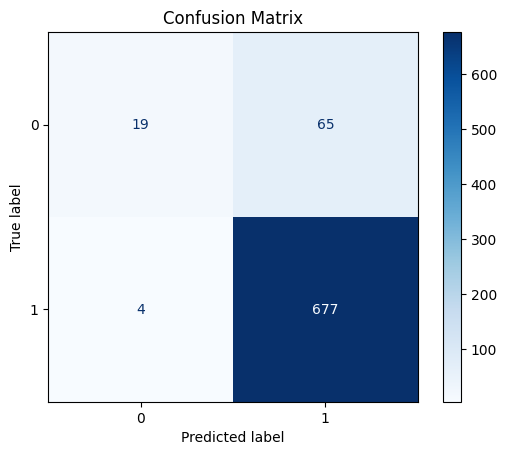

In [84]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<h3>[혼합행렬(Confusion Matrix)]</h3>
<d>
    <li>[0][0] / <b>TN(True Negative)</b> : 19명 <i>(실제 19명이 Negative였으며 모델이 이를 Negative로 정확히 예측)</i></li>
    <li>[0][1] / <b>FP(False Positive)</b> : 65명 <i>(실제 65명이 Negative였지만 모델이 이를 Positive로 잘못 예측)</i></li>
    <li>[1][0] / <b>FN(False Negative)</b> : 4명 <i>(실제 4명이 Positive였지만 모델이 이를 Negative로 잘못 예측)</i></li>
    <li>[1][1] / <b>TP(True Positive)</b> : 677명 <i>(실제 677명이 Positive였으며 모델이 이를 Positive로 정확히 예측)</i></li>
</d>
<h3>[Class 0]</h3>
<d>
    <li>정밀도: 0.83</li>
    <li>재현율: 0.23</li>
    <li>F1-Score: 0.36</li>
    <li>Support(실제 샘플 수): 84</li>
</d>
<h3>[Class 1]</h3>
<d>
    <li>정밀도: 0.91</li>
    <li>재현율: 0.99</li>
    <li>F1-Score: 0.95</li>
    <li>Support(실제 샘플 수): 681</li>
</d>

# 10. ROC 곡선(ROC Curve)

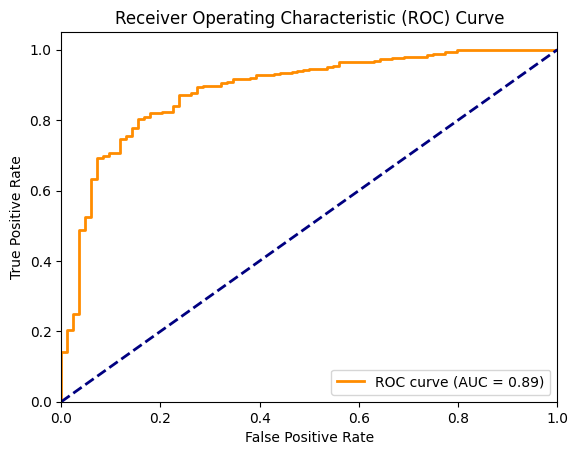

In [86]:
# 예측값과 실제값을 사용하여 ROC 곡선의 FPR(위양성률)과 TPR(민감도) 계산
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# AUC (Area Under Curve) 계산
roc_auc = roc_auc_score(y_test, y_pred_proba)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<d>
    <h3>[종합평가]</h3>
    <p>
        AUC 값의 경우, 1에 가까운 값일수록 모델 성능이 높음을 의미하며, 0.5~0.7의 수치 내에서는 준수한 성능으로 평가되며, 0.7~0.8의 수치일 경우 성능이 좋은 모델로 평가됨. ROC 곡선의 경우, 좌상단에 위치할수록 좋은 모델임을 알 수 있음. <br>
        <br>
        본 모델의 경우, AUC 값이 0.89로 좋은 성능의 모델임을 알 수 있으며 FPR (False Positive Rate)이 증가할수록 TPR (True Positive Rate) 또한 함께 증가하는 모습을 보임. 이는 모델이 높은 TPR을 달성할 수 있지만, 그에 따라 FPR 또한 함께 증가할 수 있음.
    </p>
</d>